<a href="https://www.kaggle.com/code/zahidibnshahidullah/cse366-project?scriptVersionId=271220683" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

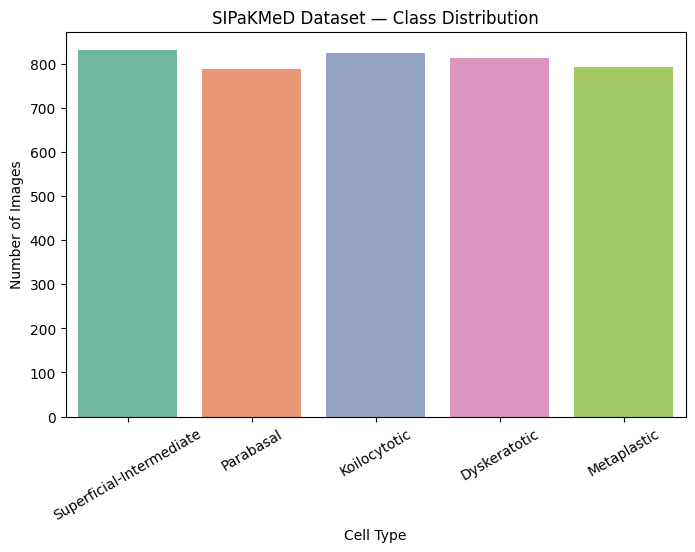

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


class_counts = {
    'Superficial-Intermediate': 831,
    'Parabasal': 787,
    'Koilocytotic': 825,
    'Dyskeratotic': 813,
    'Metaplastic': 793
}

df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Images'])

plt.figure(figsize=(8,5))
sns.barplot(x='Class', y='Images', data=df_counts, palette='Set2')
plt.title("SIPaKMeD Dataset — Class Distribution")
plt.xticks(rotation=30)
plt.ylabel("Number of Images")
plt.xlabel("Cell Type")
plt.show()


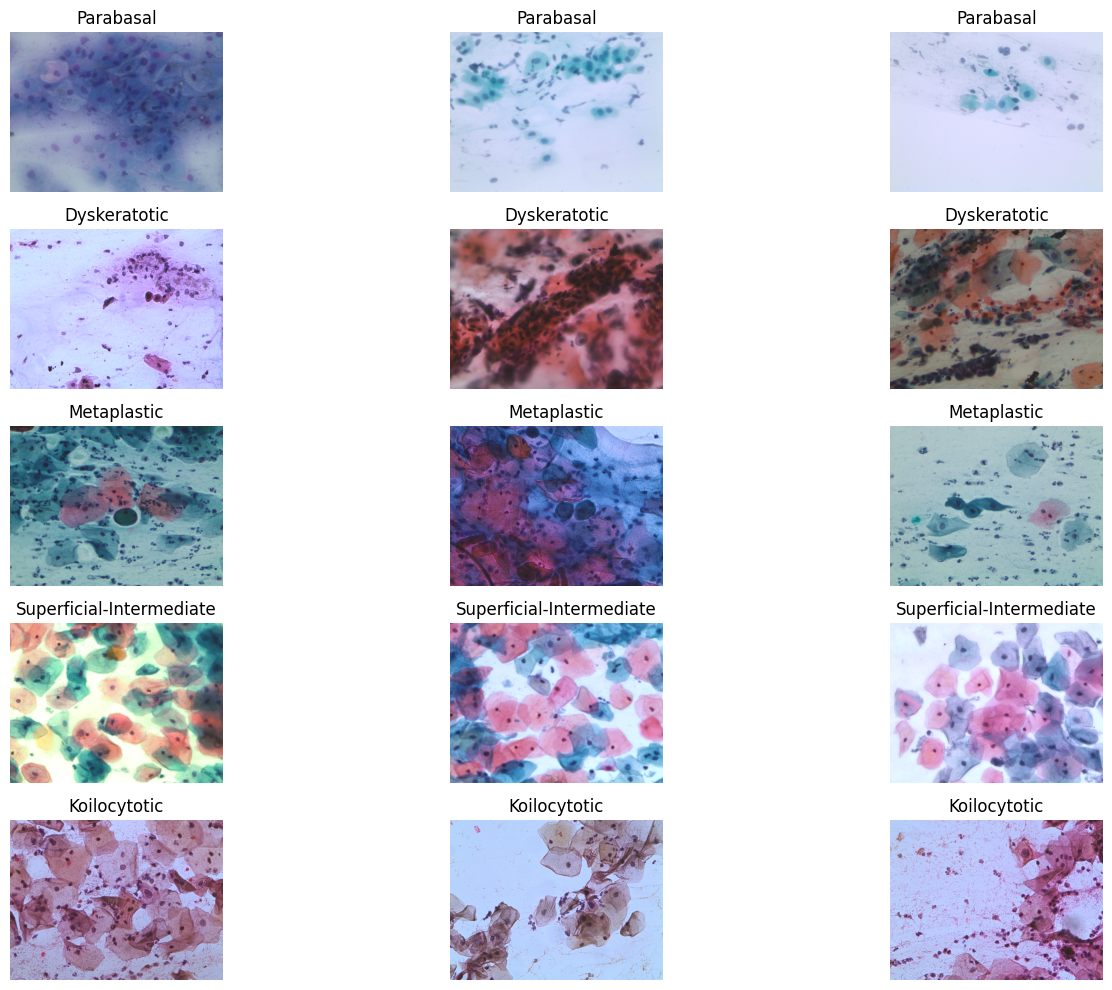

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_path = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed'

classes = os.listdir(base_path)

plt.figure(figsize=(15, 10))

for i, cls in enumerate(classes):
    inner_path = os.path.join(base_path, cls, cls)  # images are in the inner folder

    image_files = [os.path.join(inner_path, f)
                   for f in os.listdir(inner_path)
                   if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]

    sample_imgs = random.sample(image_files, min(3, len(image_files)))

    for j, img_path in enumerate(sample_imgs):
        img = mpimg.imread(img_path)
        plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.title(cls.replace('im_', ''))
        plt.axis('off')

plt.tight_layout()
plt.show()

2025-10-27 08:08:06.818937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761552487.009002      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761552487.070259      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


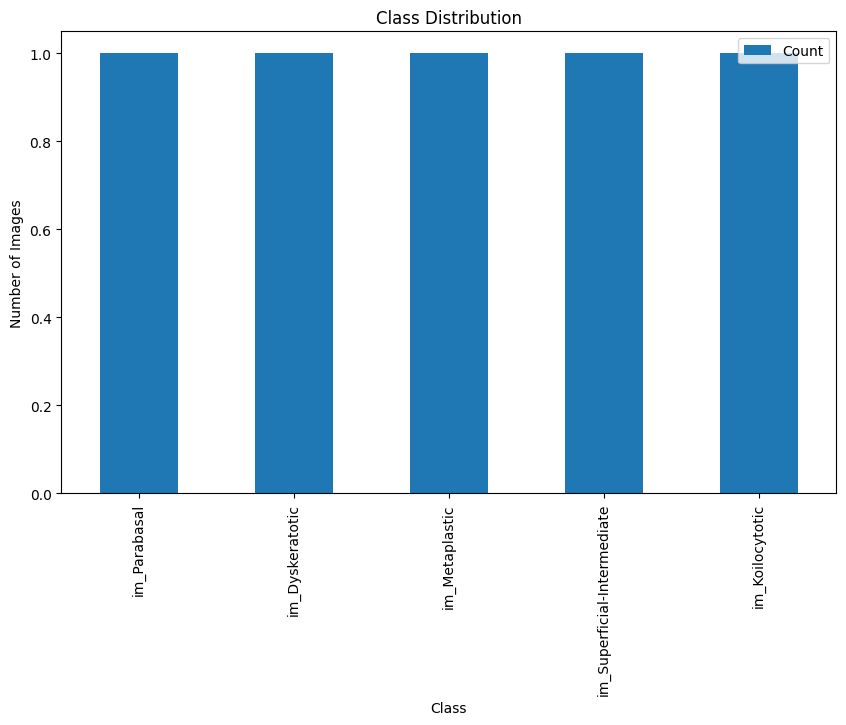

Class Balance Report:
                         Class  Count  Percentage
0                 im_Parabasal      1        20.0
1              im_Dyskeratotic      1        20.0
2               im_Metaplastic      1        20.0
3  im_Superficial-Intermediate      1        20.0
4              im_Koilocytotic      1        20.0


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_dir = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed'
class_names = os.listdir(image_dir)

class_counts = {class_name: len(os.listdir(os.path.join(image_dir, class_name))) for class_name in class_names}
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

class_counts_df.plot(kind='bar', x='Class', y='Count', title="Class Distribution", figsize=(10, 6))
plt.ylabel('Number of Images')
plt.show()

total_images = sum(class_counts.values())
class_counts_df['Percentage'] = (class_counts_df['Count'] / total_images) * 100

print("Class Balance Report:")
print(class_counts_df)


Image Property Summary Statistics:
                    min          max        mean      median         std
Width         62.000000  2048.000000  567.834497  220.000000  728.478320
Height        48.000000  1536.000000  450.047059  194.000000  536.413023
Aspect_Ratio   0.430052     3.604396    1.188856    1.186747    0.272946
Mean_R        35.119555   253.141931  140.605772  141.528697   42.161861
Mean_G        38.506560   252.953867  138.512815  138.592270   41.923195
Mean_B        32.303147   254.325726  161.714613  166.995121   47.617659


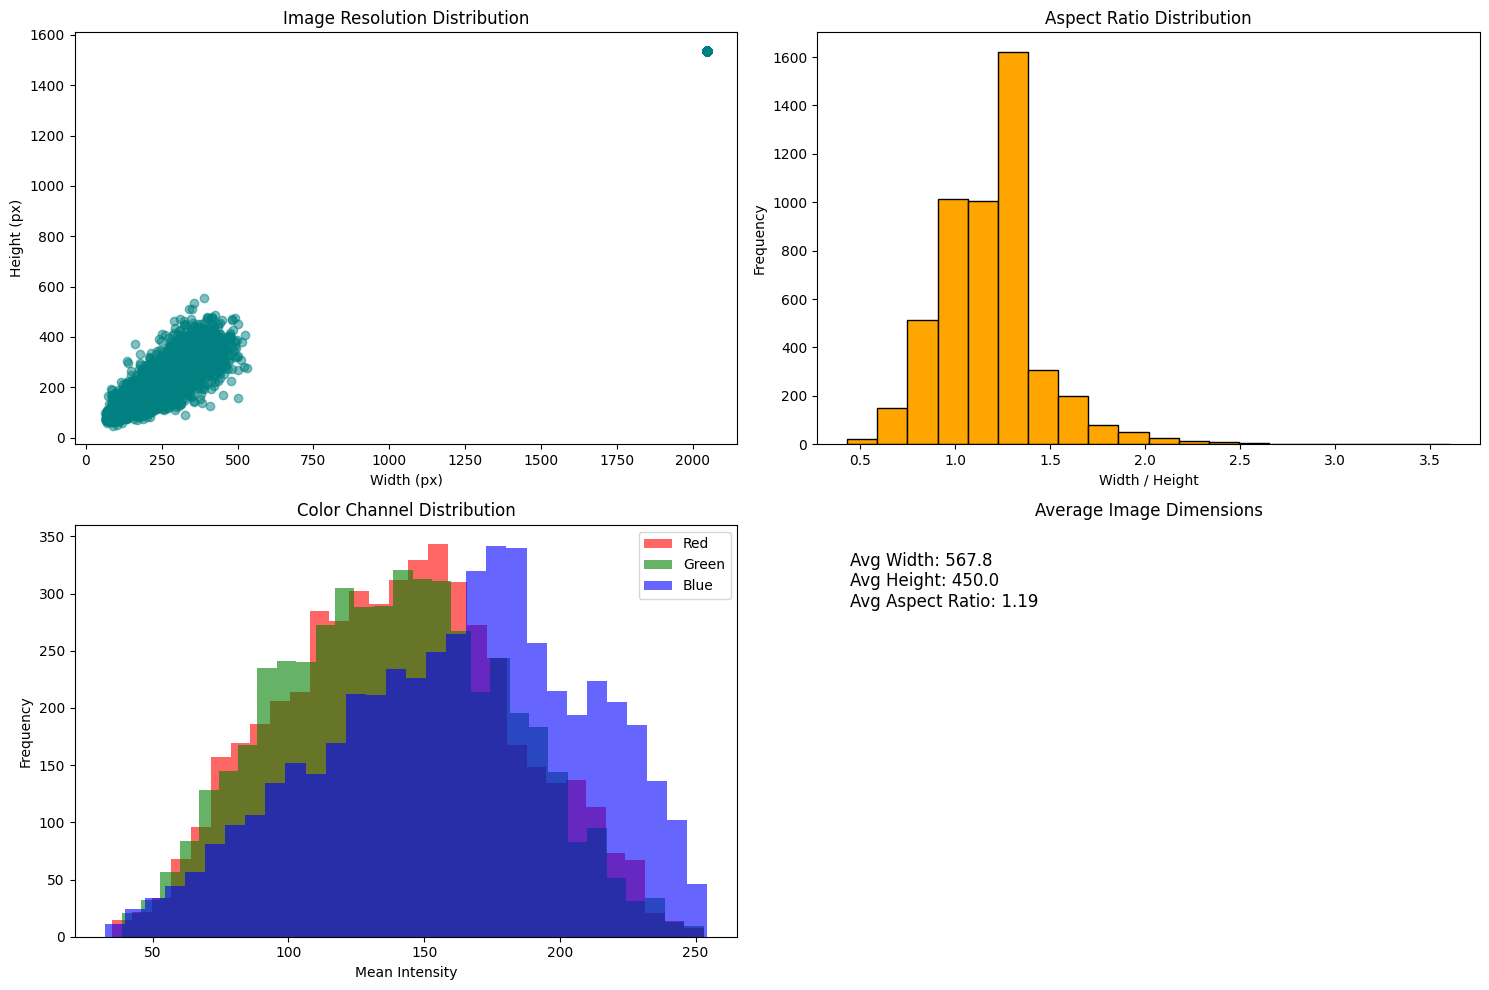

In [4]:
# =====================================================
# Universal Image Property Analyzer (works for .tif/.png and nested folders)
# =====================================================

import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt

image_dir = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed'

widths, heights, aspect_ratios = [], [], []
mean_r, mean_g, mean_b = [], [], []

# Walk through all subfolders at any depth
for root, _, files in os.walk(image_dir):
    for f in files:
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            img_path = os.path.join(root, f)
            img = cv2.imread(img_path)
            if img is None:
                continue

            if len(img.shape) == 2:  # grayscale to RGB
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

            h, w, _ = img.shape
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h)

            b, g, r = cv2.mean(img)[:3]
            mean_r.append(r)
            mean_g.append(g)
            mean_b.append(b)

# --- Create DataFrame ---
df_summary = pd.DataFrame({
    'Width': widths, 'Height': heights, 'Aspect_Ratio': aspect_ratios,
    'Mean_R': mean_r, 'Mean_G': mean_g, 'Mean_B': mean_b
})

print("\nImage Property Summary Statistics:")
print(df_summary.describe().T[['min', 'max', 'mean', '50%', 'std']].rename(columns={'50%': 'median'}))

# --- Visualization ---
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(widths, heights, alpha=0.5, color='teal')
plt.title("Image Resolution Distribution")
plt.xlabel("Width (px)"); plt.ylabel("Height (px)")

plt.subplot(2,2,2)
plt.hist(aspect_ratios, bins=20, color='orange', edgecolor='black')
plt.title("Aspect Ratio Distribution"); plt.xlabel("Width / Height"); plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(mean_r, bins=30, color='red', alpha=0.6, label='Red')
plt.hist(mean_g, bins=30, color='green', alpha=0.6, label='Green')
plt.hist(mean_b, bins=30, color='blue', alpha=0.6, label='Blue')
plt.title("Color Channel Distribution"); plt.xlabel("Mean Intensity"); plt.ylabel("Frequency"); plt.legend()

plt.subplot(2,2,4)
plt.text(0.05, 0.8, f"Avg Width: {np.mean(widths):.1f}\nAvg Height: {np.mean(heights):.1f}\nAvg Aspect Ratio: {np.mean(aspect_ratios):.2f}", fontsize=12)
plt.axis('off'); plt.title("Average Image Dimensions")
plt.tight_layout(); plt.show()


✅ Selected: im_Parabasal → 012.bmp
✅ Selected: im_Dyskeratotic → 213.bmp
✅ Selected: im_Metaplastic → 089.bmp
✅ Selected: im_Superficial-Intermediate → 113.bmp
✅ Selected: im_Koilocytotic → 041.bmp


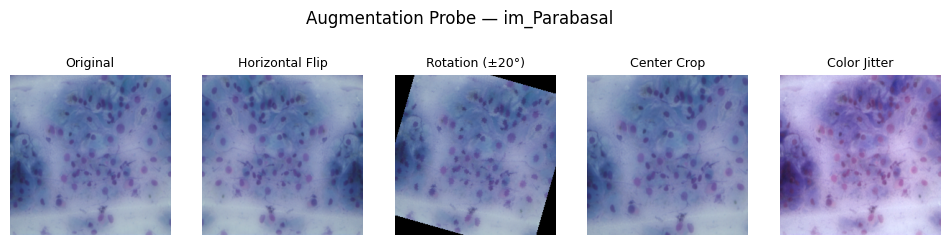

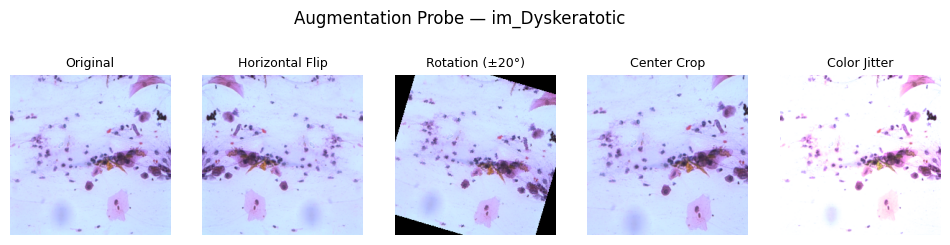

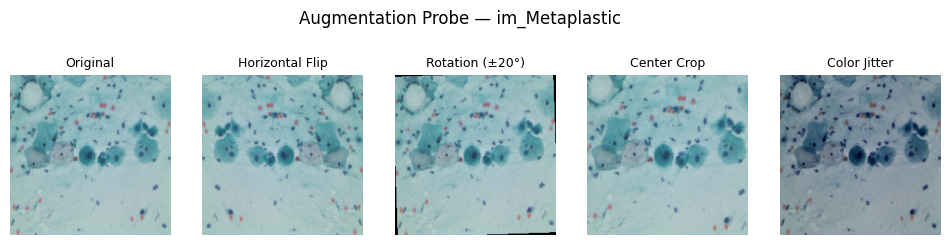

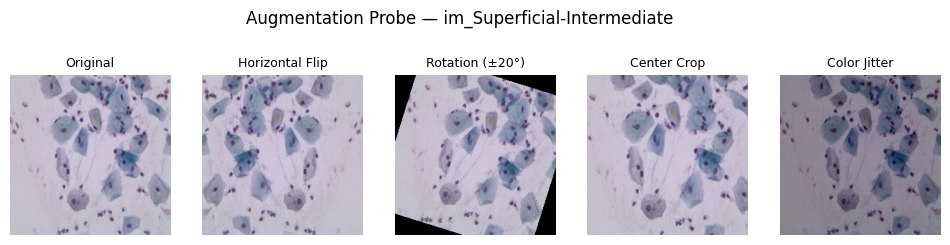

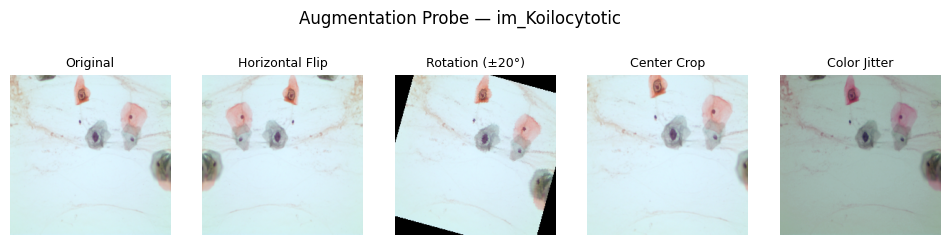

In [5]:
# =====================================================
# Augmentation Probe — follows same structure logic as your working code
# =====================================================

import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Dataset root
image_dir = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed'

# Collect one sample image per class
sample_images = []

for cls in os.listdir(image_dir):
    class_path = os.path.join(image_dir, cls)

    # Check if images are in inner folder (like /class/class/)
    inner_path = os.path.join(class_path, cls)
    if os.path.isdir(inner_path):
        class_path = inner_path

    # Collect supported image types
    image_files = [os.path.join(class_path, f)
                   for f in os.listdir(class_path)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]

    if len(image_files) == 0:
        print(f"⚠️ No images found for {cls}")
        continue

    # Pick one random image per class
    img_path = random.choice(image_files)
    sample_images.append((cls, img_path))
    print(f"✅ Selected: {cls} → {os.path.basename(img_path)}")

# --- Define augmentations ---
augmentations = {
    "Original": transforms.Compose([transforms.Resize((224, 224))]),
    "Horizontal Flip": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=1.0)
    ]),
    "Rotation (±20°)": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(degrees=20)
    ]),
    "Center Crop": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((224, 224))
    ]),
    "Color Jitter": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)
    ])
}

# --- Visualize augmentations ---
for cls, img_path in sample_images:
    try:
        img = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"❌ Error loading image {img_path}: {e}")
        continue

    plt.figure(figsize=(12, 3))
    for i, (aug_name, aug_fn) in enumerate(augmentations.items()):
        aug_img = aug_fn(img)
        plt.subplot(1, len(augmentations), i + 1)
        plt.imshow(aug_img)
        plt.axis("off")
        plt.title(aug_name, fontsize=9)
    plt.suptitle(f"Augmentation Probe — {cls}", fontsize=12)
    plt.show()
